In [1]:
from autodp.mechanism_zoo import ExactGaussianMechanism, PureDP_Mechanism
from autodp.transformer_zoo import Composition
import matplotlib.pyplot as plt
%matplotlib inline 



## Example 1:  RDP composition of a heteogeneous sequence of mechanisms

In [2]:
sigma1 = 5.0
sigma2 = 8.0

gm1 = ExactGaussianMechanism(sigma1,name='GM1')
gm2 = ExactGaussianMechanism(sigma2,name='GM2')
SVT = PureDP_Mechanism(eps=0.1,name='SVT')

# run gm1 for 3 rounds
# run gm2 for 5 times
# run SVT for once

# compose them with the transformation: compose.
compose = Composition()
composed_mech = compose([gm1, gm2, SVT], [3, 5, 1])



In [3]:
# Query for eps given delta
delta1 = 1e-6
eps1 = composed_mech.get_approxDP(delta1)

delta2 = 1e-4
eps2 = composed_mech.get_approxDP(delta2)


# Get name of the composed object, a structured description of the mechanism generated automatically
print('Mechanism name is \"', composed_mech.name,'\"')
print('Parameters are: ',composed_mech.params)
print('epsilon(delta) = ', eps1, ', at delta = ', delta1)
print('epsilon(delta) = ', eps2, ', at delta = ', delta2)




Mechanism name is " Compose:{GM1: 3, GM2: 5, SVT: 1} "
Parameters are:  {'GM1:sigma': 5.0, 'GM2:sigma': 8.0, 'SVT:eps': 0.1}
epsilon(delta) =  2.18001192542518 , at delta =  1e-06
epsilon(delta) =  1.689983703842748 , at delta =  0.0001


/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


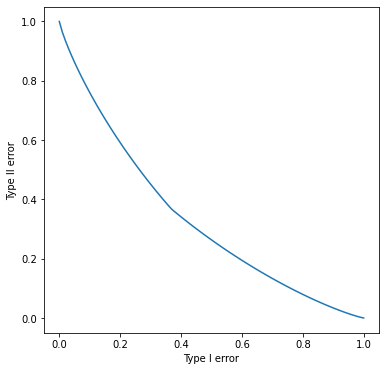

In [4]:
# Get hypothesis testing interpretation so we can directly plot it
fpr_list, fnr_list = composed_mech.plot_fDP()

plt.figure(figsize = (6,6))
plt.plot(fpr_list,fnr_list)
plt.xlabel('Type I error')
plt.ylabel('Type II error')
plt.show()


## Example 2:  Tight composition of Gaussian mechanism

In [5]:
from autodp.transformer_zoo import ComposeGaussian
from autodp.mechanism_zoo import GaussianMechanism

sigma1 = 5.0
sigma2 = 8.0

gm1 = GaussianMechanism(sigma1,name='GM1')
gm2 = GaussianMechanism(sigma2,name='GM2')

# run gm1 for 3 rounds
# run gm2 for 5 times

# compose them with the transformation: compose and
rdp_compose = Composition()
rdp_composed_mech = rdp_compose([gm1, gm2], [3, 5])

compose = ComposeGaussian()
composed_mech = compose([gm1, gm2], [3, 5])


# Query for eps given delta
delta1 = 1e-6
eps1 = composed_mech.get_approxDP(delta1)
eps1b = rdp_composed_mech.get_approxDP(delta1)

delta2 = 1e-4
eps2 = composed_mech.get_approxDP(delta2)
eps2b = rdp_composed_mech.get_approxDP(delta2)

# Get name of the composed object, a structured description of the mechanism generated automatically
print('Mechanism name is \"', composed_mech.name,'\"')
print('Parameters are: ',composed_mech.params)

print('Generic composition: epsilon(delta) = ', eps1b, ', at delta = ', delta1)
print('Gaussian composition:  epsilon(delta) = ', eps1, ', at delta = ', delta1)

print('Generic composition: epsilon(delta) = ', eps2b, ', at delta = ', delta2)
print('Gaussian composition:  epsilon(delta) = ', eps2, ', at delta = ', delta2)


Mechanism name is " Compose:{GM1: 3, GM2: 5} "
Parameters are:  {'GM1:sigma': 5.0, 'GM2:sigma': 8.0}
Generic composition: epsilon(delta) =  2.1309868424169824 , at delta =  1e-06
Gaussian composition:  epsilon(delta) =  1.984273919801572 , at delta =  1e-06
Generic composition: epsilon(delta) =  1.6484258167240666 , at delta =  0.0001
Gaussian composition:  epsilon(delta) =  1.4867384204500818 , at delta =  0.0001


/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


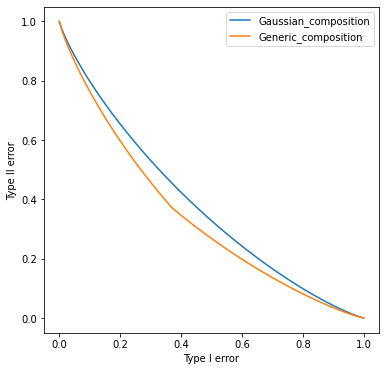

In [6]:
# Get hypothesis testing interpretation so we can directly plot it
fpr_list, fnr_list = composed_mech.plot_fDP()
fpr_list, fnr_list2 = rdp_composed_mech.plot_fDP()

plt.figure(figsize = (6,6))
plt.plot(fpr_list,fnr_list,label='Gaussian_composition')
plt.plot(fpr_list,fnr_list2,label='Generic_composition')
plt.xlabel('Type I error')
plt.ylabel('Type II error')
plt.legend()
plt.show()

## Example 3:  Compare RDP vs fDP in describing Gaussian mechanism

In [7]:
from autodp.mechanism_zoo import GaussianMechanism
import numpy as np

sigma = 1.0

gm0 = GaussianMechanism(sigma,name='GM0',approxDP_off=True, use_basic_RDP_to_approxDP_conversion=True)
gm1 = GaussianMechanism(sigma,name='GM1',approxDP_off=True)
gm1b = GaussianMechanism(sigma,name='GM1b',approxDP_off=True, use_fDP_based_RDP_to_approxDP_conversion=True)
gm2 = GaussianMechanism(sigma,name='GM2',RDP_off=True)
gm3 = GaussianMechanism(sigma,name='GM3',RDP_off=True, approxDP_off=True, fdp_off=False)


eps = np.sqrt(2)/sigma # Aligning the variance of the laplace mech and gaussian mech
laplace = PureDP_Mechanism(eps,name='Laplace')

label_list = ['naive_RDP_conversion','BBGHS_RDP_conversion','Our new method',
              'exact_eps_delta_DP','exact_fdp',r'laplace mech ($b = \sqrt{2}/\sigma$)']






/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/yuxiangw/Documents/bitbucket/autodp/autodp/autodp_core.py:233: RuntimeWarning: divide by zero encountered in log
  fdp = lambda x: 1 - np.exp(fun1(np.log(x)))


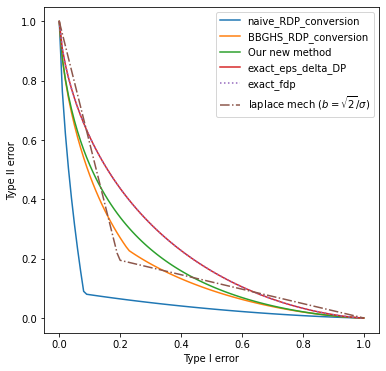

In [8]:

fpr_list, fnr_list = gm0.plot_fDP()
fpr_list1, fnr_list1 = gm1.plot_fDP()
fpr_list1b, fnr_list1b = gm1b.plot_fDP()
fpr_list2, fnr_list2 = gm2.plot_fDP()
fpr_list3, fnr_list3 = gm3.plot_fDP()
fpr_list4, fnr_list4 = laplace.plot_fDP()

plt.figure(figsize=(6,6))
plt.plot(fpr_list,fnr_list)
plt.plot(fpr_list1,fnr_list1)
plt.plot(fpr_list1b,fnr_list1b)
plt.plot(fpr_list2, fnr_list2)
plt.plot(fpr_list3, fnr_list3,':')
plt.plot(fpr_list4, fnr_list4,'-.')
plt.legend(label_list)
plt.xlabel('Type I error')
plt.ylabel('Type II error')
#plt.savefig('rdp2fdp.pdf')
plt.show()

/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


[5.298525912188081, 4.728386984943314, 4.7283856025045115, 4.377178095681224, 4.377178095627265, 1.4142111312027956]


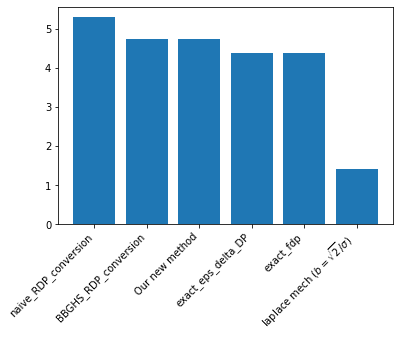

In [9]:

delta = 1e-5



eps0 = gm0.approxDP(delta)
eps1 = gm1.approxDP(delta)
eps1b = gm1b.approxDP(delta)
eps3 = gm3.approxDP(delta)
eps2 = gm2.approxDP(delta)

eps4 = laplace.approxDP(delta)

epsilons = [eps0,eps1,eps1b,eps2,eps3,eps4]

print(epsilons)

plt.bar(label_list,epsilons)
plt.xticks(rotation=45, ha="right")
plt.show()



## Example 4:  Privacy amplification by sampling

In [10]:
from autodp.mechanism_zoo import ExactGaussianMechanism, PureDP_Mechanism
from autodp.transformer_zoo import Composition, AmplificationBySampling

sigma1 = 5.0
sigma2 = 8.0

gm1 = ExactGaussianMechanism(sigma1,name='GM1')
gm2 = ExactGaussianMechanism(sigma2,name='GM2')
SVT = PureDP_Mechanism(eps=0.1,name='SVT')



In [11]:
# create transformations:  amplification by sampling
poisson_sample = AmplificationBySampling(PoissonSampling=True)
subsample = AmplificationBySampling(PoissonSampling=False)
# compose them with the transformation: compose.
compose = Composition()


In [12]:
# Now let's construct three different randomized algorithms that compose over these calls
# run the first mechanism for 30 rounds
# run the second mechanism for 50 times
# run the third mechanism for 10 times
coeffs = [30,50,10]

# when sampling, let's say the prob is the following
prob = 0.1

composed_mech = compose([gm1, gm2, SVT], coeffs)

composed_mech = compose([gm1, gm2, SVT], coeffs)

composed_poissonsampled_mech = compose([poisson_sample(gm1,prob),
                                        poisson_sample(gm2,prob),
                                        poisson_sample(SVT,prob)],
                                       coeffs)

composed_poissonsampled_mech1 = compose([poisson_sample(gm1,prob,improved_bound_flag=True),
                                        poisson_sample(gm2,prob,improved_bound_flag=True),
                                        poisson_sample(SVT,prob,improved_bound_flag=True)],
                                       coeffs)



# Now let's do subsampling. First we need to use replace-one version of the base mechanisms.
gm1.replace_one = True
gm2.replace_one = True
SVT.replace_one = True

composed_subsampled_mech = compose([subsample(gm1,prob),
                                    subsample(gm2,prob),
                                    subsample(SVT,prob)],
                                   coeffs)

composed_subsampled_mech1 = compose([subsample(gm1,prob,improved_bound_flag=True),
                                    subsample(gm2,prob,improved_bound_flag=True),
                                    subsample(SVT,prob,improved_bound_flag=True)],
                                   coeffs)


In [13]:
# Get name of the composed object, a structured description of the mechanism generated automatically
# Query for eps given delta
delta1 = 1e-6
eps1 = composed_mech.get_approxDP(delta1)

delta2 = 1e-4
eps2 = composed_mech.get_approxDP(delta2)

print('Mechanism name is \"', composed_mech.name,'\"')
print('Parameters are: ',composed_mech.params)
print('epsilon(delta) = ', eps1, ', at delta = ', delta1)
print('epsilon(delta) = ', eps2, ', at delta = ', delta2)


eps1a = composed_poissonsampled_mech.get_approxDP(delta1)
eps2a = composed_poissonsampled_mech.get_approxDP(delta2)

eps1aa = composed_poissonsampled_mech1.get_approxDP(delta1)
eps2aa = composed_poissonsampled_mech1.get_approxDP(delta2)

# Get name of the composed object, a structured description of the mechanism generated automatically
print('---------------------------------------------------')
print('Mechanism name is \"', composed_poissonsampled_mech.name,'\"')
print('Parameters are: ',composed_poissonsampled_mech.params)
print('epsilon(delta) = ', eps1a, ', at delta = ', delta1)
print('epsilon(delta) = ', eps2a, ', at delta = ', delta2)
print('------- If qualified for the improved bounds --------')
print('epsilon(delta) = ', eps1aa, ', at delta = ', delta1)
print('epsilon(delta) = ', eps2aa, ', at delta = ', delta2)


eps1b = composed_subsampled_mech.get_approxDP(delta1)
eps2b = composed_subsampled_mech.get_approxDP(delta2)

eps1bb = composed_subsampled_mech1.get_approxDP(delta1)
eps2bb = composed_subsampled_mech1.get_approxDP(delta2)

# Get name of the composed object, a structured description of the mechanism generated automatically
print('---------------------------------------------------')
print('Mechanism name is \"', composed_subsampled_mech.name,'\"')
print('Parameters are: ',composed_subsampled_mech.params)
print('epsilon(delta) = ', eps1b, ', at delta = ', delta1)
print('epsilon(delta) = ', eps2b, ', at delta = ', delta2)
print('------- If qualified for the improved bounds --------')
print('epsilon(delta) = ', eps1bb, ', at delta = ', delta1)
print('epsilon(delta) = ', eps2bb, ', at delta = ', delta2)

/usr/local/lib/python3.8/site-packages/scipy/optimize/optimize.py:2555: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


Mechanism name is " Compose:{GM1: 30, GM2: 50, SVT: 10} "
Parameters are:  {'GM1:sigma': 5.0, 'GM2:sigma': 8.0, 'SVT:eps': 0.1}
epsilon(delta) =  7.942374861004205 , at delta =  1e-06
epsilon(delta) =  6.457460671942038 , at delta =  0.0001
---------------------------------------------------
Mechanism name is " Compose:{PoissonSample:GM1: 30, PoissonSample:GM2: 50, PoissonSample:SVT: 10} "
Parameters are:  {'PoissonSample:GM1:sigma': 5.0, 'PoissonSample:GM1:PoissonSample': 0.1, 'PoissonSample:GM2:sigma': 8.0, 'PoissonSample:GM2:PoissonSample': 0.1, 'PoissonSample:SVT:eps': 0.1, 'PoissonSample:SVT:PoissonSample': 0.1}
epsilon(delta) =  0.8616498207977252 , at delta =  1e-06
epsilon(delta) =  0.645403895438424 , at delta =  0.0001
------- If qualified for the improved bounds --------
epsilon(delta) =  0.6689293610040936 , at delta =  1e-06
epsilon(delta) =  0.48950668976148426 , at delta =  0.0001
---------------------------------------------------
Mechanism name is " Compose:{Subsample:

## Example 5:  Calibrating noise to privacy requirement

In [28]:
from autodp.calibrator_zoo import eps_delta_calibrator
from autodp.mechanism_zoo import ExactGaussianMechanism, PureDP_Mechanism

"""
Try calibrating noise to privacy budgets.
Cases with a single parameter.

"""

calibrate = eps_delta_calibrator()
eps = 1.5
delta = 1e-6

mech1 = calibrate(ExactGaussianMechanism,eps,delta,[0,100],name='GM1')

mech2 = calibrate(PureDP_Mechanism,eps,delta,[0,100],name='Laplace')

print(mech1.name, mech1.params,mech1.get_approxDP(delta))

print(mech2.name, mech2.params, mech2.get_approxDP(delta))

GM1 {'sigma': 2.904058395116701} 1.4999997486031456
Laplace {'eps': 1.500001569629506} 1.500001346499671


## Example 6:  Four different ways of implementing NoisyGD (or NoisySGD)

In [14]:
#  1: Short implementation of noisy gradient descent mechanism as a composition of GMs

class NoisyGD_mech(GaussianMechanism):
    def __init__(self,sigma_list,name='NoisyGD'):
        GaussianMechanism.__init__(self, sigma=np.sqrt(1/np.sum(1/sigma_list**2)),name=name)
        self.params = {'sigma_list':sigma_list}

# The user could log sigma_list and then just declare a NoisyGD_mech object.
sigma_list = np.array([5.0,3.0,4.0])

mech = NoisyGD_mech(sigma_list)
mech.get_approxDP(delta=1e-6)

2.0677358464697515

In [30]:
from autodp import mechanism_zoo, transformer_zoo


# ----------------------------------------------------------
# 2: Implementing NoisySGD from basic building blocks

subsample = transformer_zoo.AmplificationBySampling() # by default this is using poisson sampling
mech = mechanism_zoo.GaussianMechanism(sigma=5.0)
prob = 0.01

# Create subsampled Gaussian mechanism
# Gaussian mechanism qualifies for the tight bound
SubsampledGaussian_mech = subsample(mech,prob,improved_bound_flag=True)

# Now run this for 1000 iterations
compose = transformer_zoo.Composition()
noisysgd_v1 = compose([SubsampledGaussian_mech],[1000])



In [31]:
# ----------------------------------------------------------
# 3: You could also package this together by defining a NoisySGD mechanism then put it in the Mechanism_zoo

from autodp.autodp_core import Mechanism

class NoisySGD_mech(Mechanism):
    def __init__(self,prob,sigma,niter,name='NoisySGD'):
        Mechanism.__init__(self)
        self.name=name
        self.params={'prob':prob,'sigma':sigma,'niter':niter}
        
        # create such a mechanism as in previously
        subsample = transformer_zoo.AmplificationBySampling() # by default this is using poisson sampling
        mech = mechanism_zoo.GaussianMechanism(sigma=sigma)
        prob = 0.01
        # Create subsampled Gaussian mechanism
        SubsampledGaussian_mech = subsample(mech,prob,improved_bound_flag=True)

        # Now run this for niter iterations
        compose = transformer_zoo.Composition()
        mech = compose([SubsampledGaussian_mech],[niter])

        # Now we get it and let's extract the RDP function and assign it to the current mech being constructed
        rdp_total = mech.RenyiDP
        self.propagate_updates(rdp_total,type_of_update='RDP')

noisysgd_v2 = NoisySGD_mech(prob=prob,sigma=5.0,niter=1000)
        


In [32]:
# ----------------------------------------------------------
# 4: Online decision. Hetereogenous sigma decided online
# (maybe as a function of computed eps)
# Alternatively if we want to do it via composition, so we can make online decision about
# the sigma in the sigma_list

delta = 1e-6

compose = transformer_zoo.Composition()
prob= 0.01
sigma = 5
nepochs = 10

online_ngd = NoisySGD_mech(prob=prob,sigma=sigma,niter=100)
for i in range(nepochs):
    eps = online_ngd.get_approxDP(delta)
    print('epoch = ',i+1, ', iteration = ',100*(i+1), ', epsilon = ',eps, ', at delta=', delta)
    #determine the next prob, sigma (maybe adaptively), for example
    prob = prob*1.01
    sigma = sigma * np.exp(0.1*eps)
    print('updated prob = ',prob, ', sigma = ',sigma)
    # use the above class to descrie mechanisms you run on the fly
    mech_cur = NoisySGD_mech(prob=prob,sigma=sigma,niter=100)
    
    online_ngd = compose([online_ngd, mech_cur],[1,1])

# The above is quite general and can be viewed as a privacy accountant

epoch =  1 , iteration =  100 , epsilon =  0.08216484696031025 , at delta= 1e-06
updated prob =  0.0101 , sigma =  5.041251663233121
epoch =  2 , iteration =  200 , epsilon =  0.11676903640602136 , at delta= 1e-06
updated prob =  0.010201 , sigma =  5.100462902312742
epoch =  3 , iteration =  300 , epsilon =  0.14319884487742168 , at delta= 1e-06
updated prob =  0.01030301 , sigma =  5.174026395200586
epoch =  4 , iteration =  400 , epsilon =  0.16516102028030705 , at delta= 1e-06
updated prob =  0.0104060401 , sigma =  5.260190733882066
epoch =  5 , iteration =  500 , epsilon =  0.18411555290130882 , at delta= 1e-06
updated prob =  0.010510100501 , sigma =  5.357936087232907
epoch =  6 , iteration =  600 , epsilon =  0.20082446740179327 , at delta= 1e-06
updated prob =  0.01061520150601 , sigma =  5.46662426274389
epoch =  7 , iteration =  700 , epsilon =  0.21575356337708634 , at delta= 1e-06
updated prob =  0.010721353521070101 , sigma =  5.585850175052086
epoch =  8 , iteration =  

In [33]:
delta = 1e-6

print(noisysgd_v1.get_approxDP(delta))
print(noisysgd_v2.get_approxDP(delta))
print(online_ngd.get_approxDP(delta))

0.27105623043762284
0.27105623043762284
0.26269378582675573
